In [3]:
import sys
import numpy as np
import copy

matrix = [[0,3,6,7,5,3,5],
[6,0,2,9,1,2,7],
[0,9,0,3,6,0,6],
[2,6,1,0,8,7,9],
[2,0,2,3,0,7,5],
[9,2,2,8,9,0,7],
[3,6,1,2,9,3,0]]


data = [1, 2, 3, 4, 5, 6, 7]

"""
for test purposes
matrix = [
    [0, 2, 9, 10],
    [1, 0, 6, 4],
    [15, 7, 0, 8],
    [6, 3, 12, 0]
]
data = [1, 2, 3, 4]
"""
n = len(data)
all_sets = []
g = {}
p = []

positions = np.random.rand(n, 2)
final_path = list()


def main():
    for x in range(1, n):
        g[x + 1, ()] = matrix[x][0]

    cost=get_minimum(1, (2,3,4,5,6,7))

    print('\n\nSolution to TSP: {1, ', end='')
    final_path.append(1)
    solution = p.pop()
    print(solution[1][0], end=', ')
    final_path.append(solution[1][0])
    for x in range(n - 2):
        for new_solution in p:
            if tuple(solution[1]) == new_solution[0]:
                solution = new_solution
                print(solution[1][0], end=', ')
                final_path.append(solution[1][0])
                break
    print('1}')
    final_path.append(1)
    return cost


def get_minimum(k, a):
    if (k, a) in g:
        # Already calculated Set g[%d, (%s)]=%d' % (k, str(a), g[k, a]))
        return g[k, a]

    values = []
    all_min = []
    for j in a:
        set_a = copy.deepcopy(list(a))
        set_a.remove(j)
        all_min.append([j, tuple(set_a)])
        result = get_minimum(j, tuple(set_a))
        values.append(matrix[k-1][j-1] + result)

    # get minimun value from set as optimal solution for
    g[k, a] = min(values)
    p.append(((k, a), all_min[values.index(g[k, a])]))

    return g[k, a]


if __name__ == '__main__':
    cost=main()
    print(final_path)
    print(positions)
    #sys.exit(0)  




Solution to TSP: {1, 7, 4, 3, 6, 2, 5, 1}
[1, 7, 4, 3, 6, 2, 5, 1]
[[0.52950673 0.95076053]
 [0.72413217 0.0379802 ]
 [0.90235739 0.91904935]
 [0.25337701 0.26070372]
 [0.33485954 0.37709259]
 [0.15532212 0.10393683]
 [0.51918916 0.49844067]]


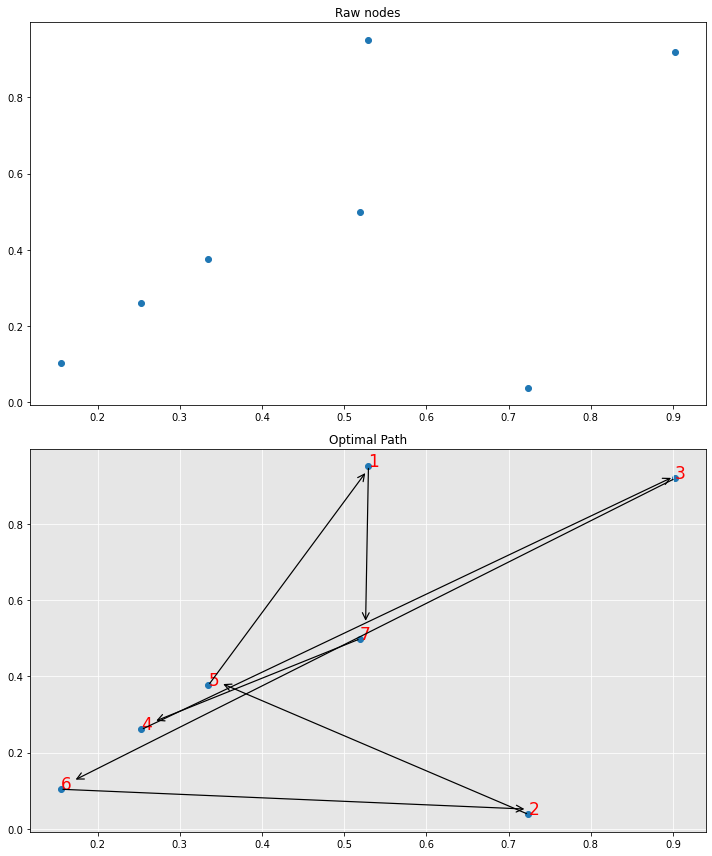

Total Nodes: 7
Distance : 4.534
Cost:  13
Path Taken :  1 7 4 3 6 2 5 1 

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, figsize=(10,12))         # Prepare 2 plots
ax[0].set_title('Raw nodes')
ax[1].set_title('Optimal Path')
ax[0].scatter(positions[:, 0], positions[:, 1])             # plot A
ax[1].scatter(positions[:, 0], positions[:, 1])             # plot B
start_node = 0
distance = 0.0
style = dict(size=17, color='red')
for i in range(n):
    start_pos = positions[start_node]
    next_node = final_path[i+1]
    end_pos = positions[next_node-1]
    ax[1].annotate(next_node,
            xy=start_pos, xycoords='data',
            xytext=end_pos, textcoords='data',
            arrowprops=dict(arrowstyle="<-",lw=1.2,connectionstyle="arc3"), **style)
    distance += np.linalg.norm(end_pos - start_pos)
    start_node = next_node-1

textstr = "Number of Nodes: %d\n Total distance : %.3f" % (n, distance)
#props = dict(boxstyle='round', facecolor='yellow', alpha=0.5)
#ax[1].text(0.05, 0.15, textstr, transform=ax[1].transAxes, fontsize=13, # Textbox
#        verticalalignment='top', bbox=props)

plt.grid(color='w', linestyle='solid')
ax[1].set_facecolor('#E6E6E6')
plt.tight_layout()
plt.show()
print("Total Nodes: %d\nDistance : %.3f" % (n, distance))
print("Cost: ",cost)
print("Path Taken : ", end = ' ') 
for i in range(n + 1): 
    print(final_path[i], end = ' ') 